In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

C:\Users\gnana\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data__imp_1= pd.read_csv('cleaned_data.csv')

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [4]:
X = data__imp_1.drop(columns=['close'])

# Using close as the target variable
y = data__imp_1['close']

In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the KNN Regression model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate RMSE for KNN Regression
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

# Print the RMSE for KNN Regression
print("RMSE - KNN Regression:", rmse_knn)
print("MSE - KNN Regression:", mse)
print("r2 - KNN Regression:", r2)

RMSE - KNN Regression: 7.302326616132154
MSE - KNN Regression: 53.32397400867208
r2 - KNN Regression: 0.9689940558162238


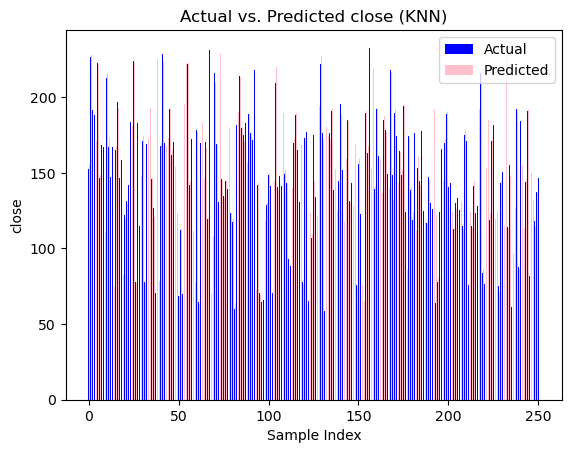

In [7]:
indices = np.arange(len(y_test))

# Bar plot for actual vs. predicted values
plt.bar(indices, y_test, width=0.4, color='blue', label='Actual')
plt.bar(indices + 0.4, y_pred_knn, width=0.4, color='pink', label='Predicted')

plt.xlabel('Sample Index')
plt.ylabel('close')
plt.title('Actual vs. Predicted close (KNN)')
plt.legend()
plt.show()

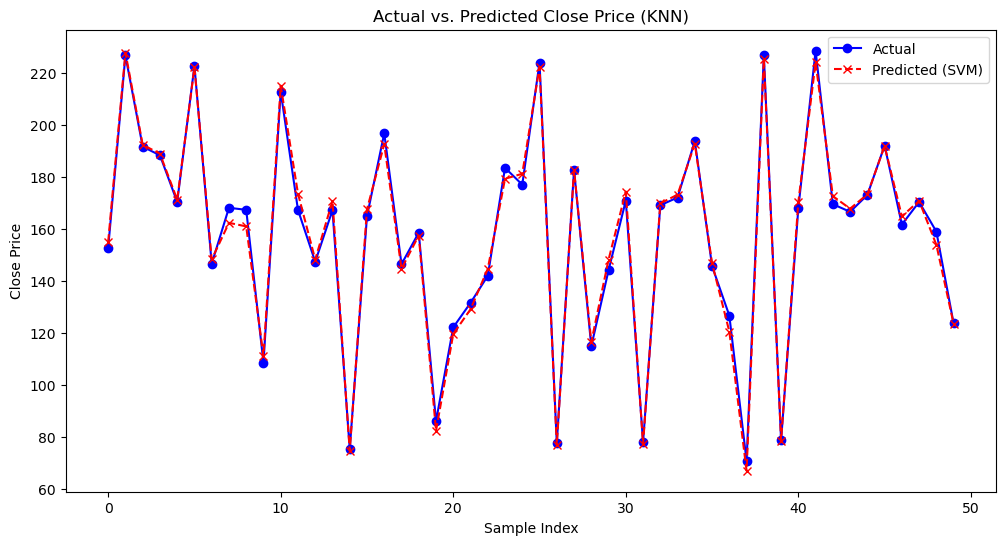

In [8]:
# Select a subset of the test set for clearer visualization (e.g., first 50 points)
subset_indices = np.arange(50)
y_test_subset = y_test.iloc[subset_indices]
y_pred_subset_knn = y_pred_knn[:50]

# Plot actual vs predicted values as line plots for SVM
plt.figure(figsize=(12, 6))
plt.plot(subset_indices, y_test_subset, marker='o', color='blue', label='Actual')
plt.plot(subset_indices, y_pred_subset_knn, marker='x', color='red', label='Predicted (SVM)', linestyle='--')

plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price (KNN)')
plt.legend()
plt.show()


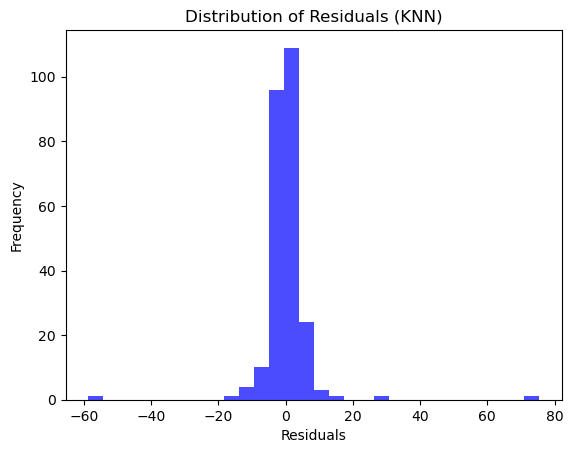

In [9]:
# Calculate residuals
residuals_knn = y_test - y_pred_knn

# Plotting residuals as a histogram
plt.hist(residuals_knn, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Residuals (KNN)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

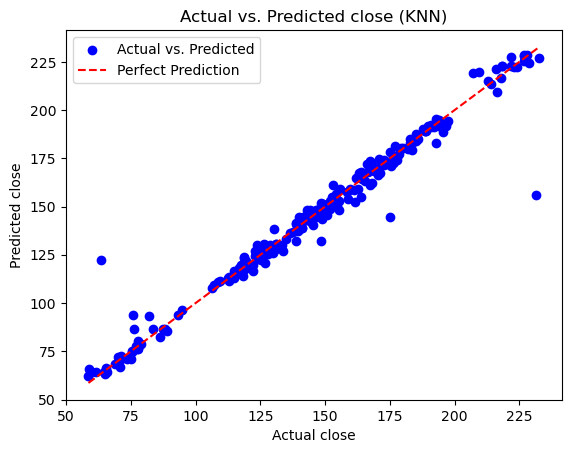

In [10]:
# Scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred_knn, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.title('Actual vs. Predicted close (KNN)')
plt.xlabel('Actual close')
plt.ylabel('Predicted close')
plt.legend()
plt.show()